In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)

In [2]:
mu = 1
n = 50
dt = 0.1
x0 = 100
x = pd.DataFrame()
np.random.seed(1)

In [3]:
for sigma in np.arange(0.8, 2.0, 0.2):
    step = np.exp((mu-sigma**2/2.0)*dt)*np.exp(sigma*np.random.normal(0, np.sqrt(dt), (1, n)))
    temp = pd.DataFrame(x0*step.cumprod())
    x = pd.concat([x, temp], axis=1)

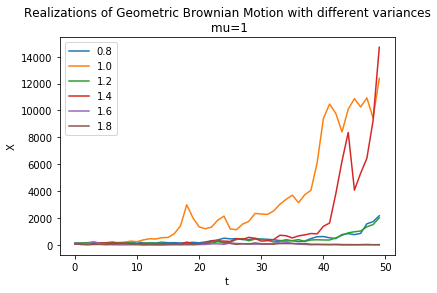

In [4]:
x.columns = np.arange(0.8, 2.0 ,0.2)
plt.plot(x)
plt.legend(x.columns)
plt.xlabel('t')
plt.ylabel('X')
plt.title('Realizations of Geometric Brownian Motion with different variances\n mu=1')
plt.show()

In [5]:
iplot(x.iplot(kind='scatter', asFigure=True))

In [6]:
class PRNG(object):
    def __init__(self, seed):
        self._x = seed
    def __call__(self):
        return self._x

In [7]:
class MCL_PRNG(PRNG):
    def __init__(self, seed):
        super().__init__(seed)
    def __call__(self):
        self._x = ((2**18+1)*self._x+1)%(2**35)
        return self._x/(2**35)

In [8]:
mlc = MCL_PRNG(212)

In [9]:
mlc()

0.0016174378397408873

In [10]:
number = 10**4
c = 1
# os comprimentos de l e n, foram escolhidos de forma que o tamanho do intervalo seja 1.0
l = 3
n = 25
iopen = c - 4*l
iclose = c + 4*l
print("Intervalo: [",iopen,",",iclose,"]")
print("Números de Elementos:",iclose-iopen+1)
print("Tamanho do Intervalo:",float((iclose-iopen+1)/n))

Intervalo: [ -11 , 13 ]
Números de Elementos: 25
Tamanho do Intervalo: 1.0


In [11]:
box = np.zeros(n)
points = np.zeros(n)
points = np.array([-10.5 + i for i in range(0,n)])

In [12]:
i = 0
while(i < number):
    alpha = np.random.normal(c, l)
    if iopen <= alpha <= iclose:
        box[int(alpha+11)] += 1
        i += 1

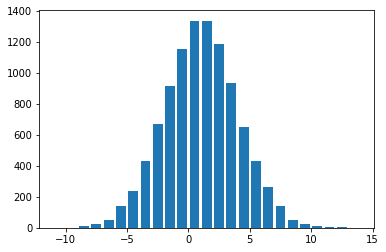

In [13]:
plt.bar(points, box)
plt.show()

In [14]:
box = np.zeros(n)
points = np.zeros(n)
points = np.array([-10.5 + i for i in range(0,n)])

In [15]:
i = 0
while(i < number):
    alpha = np.random.poisson(c)
    if iopen <= alpha <= iclose:
        box[int(alpha+11)] += 1
        i += 1

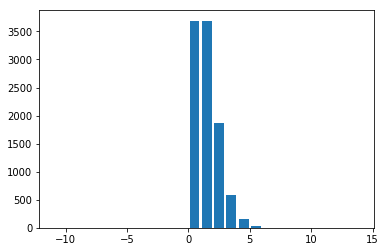

In [16]:
plt.bar(points, box)
plt.show()

In [17]:
box = np.zeros(n)
points = np.zeros(n)
points = np.array([-10.5 + i for i in range(0,n)])

In [18]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

i = 0
while(i < number):
    alpha = np.random.weibull(c)
    if iopen <= alpha <= iclose:
        box[int(alpha+11)] += 1
        i += 1

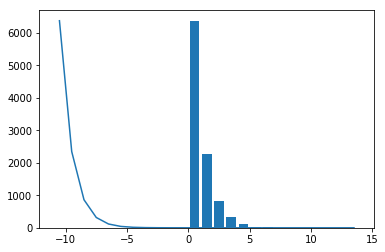

In [19]:
plt.bar(points, box)
plt.plot(points, weib(points, 1., c)*(box.max()/weib(points, 1., c).max()))
plt.show()

In [20]:
box = np.zeros(n)
points = np.zeros(n)
points = np.array([-10.5 + i for i in range(0,n)])

In [21]:
i = 0
while(i < number):
    alpha = np.random.lognormal(c, l)
    if iopen <= alpha <= iclose:
        box[int(alpha+11)] += 1
        i += 1

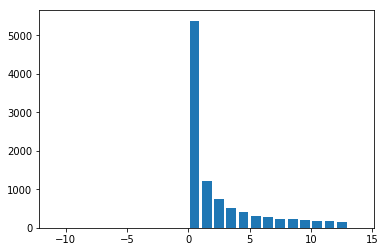

In [22]:
plt.bar(points, box)
plt.show()

In [23]:
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))    / (x * sigma * np.sqrt(2 * np.pi)))